Test Function norm vs. Batch norm.
=========================================================

Architecture:

        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        if self.useBN:
            self.BN1 = nn.BatchNorm2d(20)
        self.conv2 = nn.Conv2d(20, 50, kernel_size=5)
        if self.useBN:
            self.BN2 = nn.BatchNorm2d(50)
        self.conv3 = nn.Conv2d(50, 500, kernel_size=4)
        if self.useBN:
            self.BN3 = nn.BatchNorm2d(500)
        self.fc = nn.Linear(500,10)
        
VAE: Vanilla VAE 784 -> 128 -> 100

Regularization samples = 2x training samples

$\lambda =$ 0.1

In [1]:
from __future__ import print_function, division
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os
import os.path as osp
from pytorch_utils import StatsLogger
from itertools import product

In [2]:
basedir = ['/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_'+str(i)+'_LeNet' for i in range(1,11)]
basedir

['/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_1_LeNet',
 '/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_2_LeNet',
 '/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_3_LeNet',
 '/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_4_LeNet',
 '/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_5_LeNet',
 '/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_6_LeNet',
 '/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_7_LeNet',
 '/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_8_LeNet',
 '/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_9_LeNet',
 '/esat/kochab/arannen/Pytorch_fun_regularization_generation1/MNIST_300_10_LeNet']

=========================================================================================================
Without function norm:
============================================================

In [3]:
w = (0,0.0005)
b = (True, False)

In [4]:
expnames = {}
for k in range(1,11):
    s = product((False,),b,b,w)
    expnames[k] = ['MNIST_300_'+str(k)+'_LeNet_'+str(i[0])+'_'+str(i[1])+'_'+str(i[2])+'_'+str(i[3]) for i in list(s)]

In [5]:
expdirs = {}
expnames_kept = {}
for k in range(1,11):
    expdirs[k] = []
    expnames_kept[k] = []
    for exp in expnames[k]:
        this = 0
        b = True
        try:
            while b:
                this -= 1
                if osp.isdir(osp.join(basedir[k-1], exp)):
                    last = sorted(os.listdir(osp.join(basedir[k-1], exp)), key=int)[this]
                    expdir = osp.join(basedir[k-1], exp, last)
                    if osp.isfile(osp.join(expdir, "stats.pkl")):
                        expdirs[k].append(expdir)
                        expnames_kept[k].append(exp)
                        print(exp + ": loading", last)
                        break
                else:
                    b = False

        except IndexError:
            continue
        
expnames = expnames_kept


MNIST_300_1_LeNet_False_True_False_0: loading 10000
MNIST_300_1_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_1_LeNet_False_False_False_0: loading 10000
MNIST_300_1_LeNet_False_False_False_0.0005: loading 10000
MNIST_300_2_LeNet_False_True_False_0: loading 10000
MNIST_300_2_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_2_LeNet_False_False_False_0: loading 10000
MNIST_300_2_LeNet_False_False_False_0.0005: loading 10000
MNIST_300_3_LeNet_False_True_False_0: loading 10000
MNIST_300_3_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_3_LeNet_False_False_False_0: loading 10000
MNIST_300_3_LeNet_False_False_False_0.0005: loading 10000
MNIST_300_4_LeNet_False_True_False_0: loading 10000
MNIST_300_4_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_4_LeNet_False_False_False_0: loading 10000
MNIST_300_4_LeNet_False_False_False_0.0005: loading 10000
MNIST_300_5_LeNet_False_True_False_0: loading 10000
MNIST_300_5_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_5

In [6]:
stats = {}
for k in range(1,11):
    stats[k] = []
    for expdir in expdirs[k]:
        stats[k].append(StatsLogger(expdir))

In [7]:
curves  = {}
for k in range(1,11):
    curves[k] = []
    for a in stats[k]:
        c = a.curve('Accuracy','test')
        curves[k].append(c)

Text(0.5,0,u'iter')

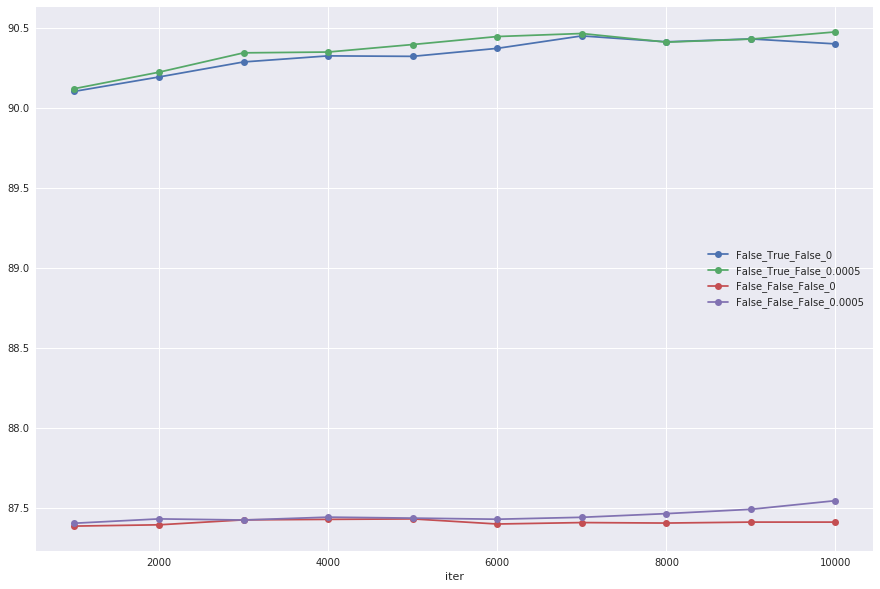

In [8]:
w = (0,0.0005)
b = (True, False)
s = product((False,),b,(False,),w)
expdisp = [str(i[0])+'_'+str(i[1])+'_'+str(i[2])+'_'+str(i[3]) for i in list(s)]

plt.figure(figsize=(15, 10))

for i in range(4):
    cx = np.zeros((len(curves[1][0].x),10))
    cy = np.zeros((len(curves[1][0].y),10))
    for k in range(1,11):
        cx[:,k-1]= np.array(curves[k][i].x)
        cy[:,k-1]= np.array(curves[k][i].y) 
    plt.plot(cx.mean(1), cy.mean(1), "o-", label=expdisp[i])
    # legend = b1_b2_b3_c: b1 = Function norm or not; b2 = Batch norm. or not; b3 = Dropout or not; c = weight decay
plt.legend()
plt.xlabel('iter')
    

=========================================================================================================
With function norm:
============================================================

In [12]:
w = (0,0.0005)
b = (True, False)

In [13]:
expnames = {}
for k in range(1,11):
    s = product((True,),b,b,w)
    expnames[k] = ['MNIST_300_'+str(k)+'_LeNet_'+str(i[0])+'_'+str(i[1])+'_'+str(i[2])+'_'+str(i[3]) for i in list(s)]

In [14]:
expdirs = {}
expnames_kept = {}
for k in range(1,11):
    expdirs[k] = []
    expnames_kept[k] = []
    for exp in expnames[k]:
        this = 0
        b = True
        try:
            while b:
                this -= 1
                if osp.isdir(osp.join(basedir[k-1], exp)):
                    last = sorted(os.listdir(osp.join(basedir[k-1], exp)), key=int)[this]
                    expdir = osp.join(basedir[k-1], exp, last)
                    if osp.isfile(osp.join(expdir, "stats.pkl")):
                        expdirs[k].append(expdir)
                        expnames_kept[k].append(exp)
                        print(exp + ": loading", last)
                        break
                else:
                    b = False

        except IndexError:
            continue
        
expnames = expnames_kept

MNIST_300_1_LeNet_True_True_False_0: loading 10000
MNIST_300_1_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_1_LeNet_True_False_False_0: loading 10000
MNIST_300_1_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_2_LeNet_True_True_False_0: loading 10000
MNIST_300_2_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_2_LeNet_True_False_False_0: loading 10000
MNIST_300_2_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_3_LeNet_True_True_False_0: loading 10000
MNIST_300_3_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_3_LeNet_True_False_False_0: loading 10000
MNIST_300_3_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_4_LeNet_True_True_False_0: loading 10000
MNIST_300_4_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_4_LeNet_True_False_False_0: loading 10000
MNIST_300_4_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_5_LeNet_True_True_False_0: loading 10000
MNIST_300_5_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_5_LeNet_True_False_

In [15]:
stats = {}
for k in range(1,11):
    stats[k] = []
    for expdir in expdirs[k]:
        stats[k].append(StatsLogger(expdir))

In [16]:
curves  = {}
for k in range(1,11):
    curves[k] = []
    for a in stats[k]:
        c = a.curve('Accuracy','test')
        curves[k].append(c)

Text(0.5,0,u'iter')

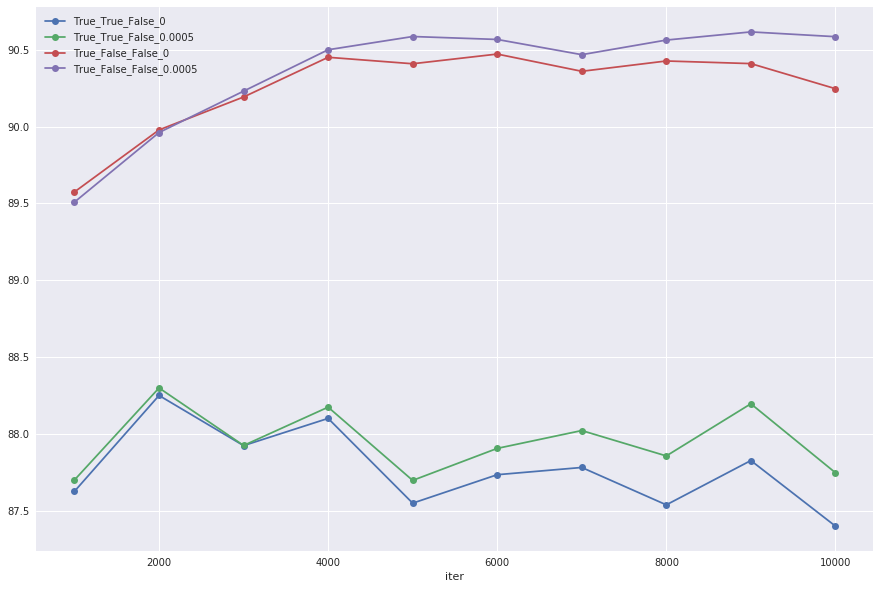

In [17]:
w = (0,0.0005)
b = (True, False)
s = product((True,),b,(False,),w)
expdisp = [str(i[0])+'_'+str(i[1])+'_'+str(i[2])+'_'+str(i[3]) for i in list(s)]

plt.figure(figsize=(15, 10))

for i in range(4):
    cx = np.zeros((len(curves[1][0].x),10))
    cy = np.zeros((len(curves[1][0].y),10))
    for k in range(1,11):
        cx[:,k-1]= np.array(curves[k][i].x)
        cy[:,k-1]= np.array(curves[k][i].y) 
    plt.plot(cx.mean(1), cy.mean(1), "o-", label=expdisp[i])
    # legend = b1_b2_b3_c: b1 = Function norm or not; b2 = Batch norm. or not; b3 = Dropout or not; c = weight decay

plt.legend()
plt.xlabel('iter')
    

=========================================================================================================
With Batch norm.:
============================================================

In [22]:
w = (0,0.0005)
b = (True, False)

In [23]:
expnames = {}
for k in range(1,11):
    s = product(b,(True,),b,w)
    expnames[k] = ['MNIST_300_'+str(k)+'_LeNet_'+str(i[0])+'_'+str(i[1])+'_'+str(i[2])+'_'+str(i[3]) for i in list(s)]

In [24]:
expdirs = {}
expnames_kept = {}
for k in range(1,11):
    expdirs[k] = []
    expnames_kept[k] = []
    for exp in expnames[k]:
        this = 0
        b = True
        try:
            while b:
                this -= 1
                if osp.isdir(osp.join(basedir[k-1], exp)):
                    last = sorted(os.listdir(osp.join(basedir[k-1], exp)), key=int)[this]
                    expdir = osp.join(basedir[k-1], exp, last)
                    if osp.isfile(osp.join(expdir, "stats.pkl")):
                        expdirs[k].append(expdir)
                        expnames_kept[k].append(exp)
                        print(exp + ": loading", last)
                        break
                else:
                    b = False

        except IndexError:
            continue
        
expnames = expnames_kept

MNIST_300_1_LeNet_True_True_False_0: loading 10000
MNIST_300_1_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_1_LeNet_False_True_False_0: loading 10000
MNIST_300_1_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_2_LeNet_True_True_False_0: loading 10000
MNIST_300_2_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_2_LeNet_False_True_False_0: loading 10000
MNIST_300_2_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_3_LeNet_True_True_False_0: loading 10000
MNIST_300_3_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_3_LeNet_False_True_False_0: loading 10000
MNIST_300_3_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_4_LeNet_True_True_False_0: loading 10000
MNIST_300_4_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_4_LeNet_False_True_False_0: loading 10000
MNIST_300_4_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_5_LeNet_True_True_False_0: loading 10000
MNIST_300_5_LeNet_True_True_False_0.0005: loading 10000
MNIST_300_5_LeNet_False_True_

In [25]:
stats = {}
for k in range(1,11):
    stats[k] = []
    for expdir in expdirs[k]:
        stats[k].append(StatsLogger(expdir))

In [26]:
curves  = {}
for k in range(1,11):
    curves[k] = []
    for a in stats[k]:
        c = a.curve('Accuracy','test')
        curves[k].append(c)

Text(0.5,0,u'iter')

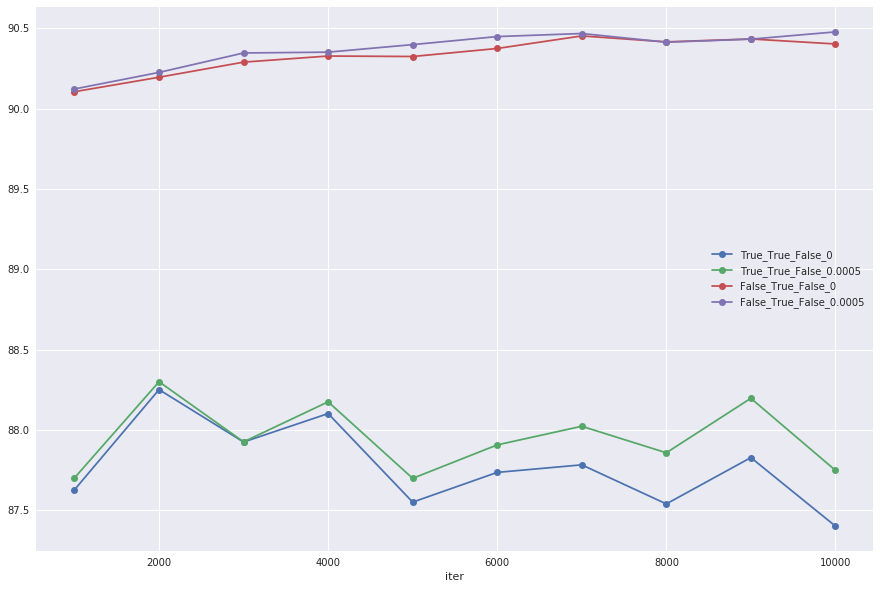

In [27]:
w = (0,0.0005)
b = (True, False)
s = product(b,(True,),(False,),w)
expdisp = [str(i[0])+'_'+str(i[1])+'_'+str(i[2])+'_'+str(i[3]) for i in list(s)]

plt.figure(figsize=(15, 10))

for i in range(4):
    cx = np.zeros((len(curves[1][0].x),10))
    cy = np.zeros((len(curves[1][0].y),10))
    for k in range(1,11):
        cx[:,k-1]= np.array(curves[k][i].x)
        cy[:,k-1]= np.array(curves[k][i].y) 
    plt.plot(cx.mean(1), cy.mean(1), "o-", label=expdisp[i])
    # legend = b1_b2_b3_c: b1 = Function norm or not; b2 = Batch norm. or not; b3 = Dropout or not; c = weight decay
    
plt.legend()
plt.xlabel('iter')
    

=========================================================================================================
Without Batch norm:
============================================================

In [33]:
w = (0,0.0005)
b = (True, False)

In [39]:
expnames = {}
for k in range(1,11):
    s = product(b,(False,),b,w)
    expnames[k] = ['MNIST_300_'+str(k)+'_LeNet_'+str(i[0])+'_'+str(i[1])+'_'+str(i[2])+'_'+str(i[3]) for i in list(s)]

In [40]:
expdirs = {}
expnames_kept = {}
for k in range(1,11):
    expdirs[k] = []
    expnames_kept[k] = []
    for exp in expnames[k]:
        this = 0
        b = True
        try:
            while b:
                this -= 1
                if osp.isdir(osp.join(basedir[k-1], exp)):
                    last = sorted(os.listdir(osp.join(basedir[k-1], exp)), key=int)[this]
                    expdir = osp.join(basedir[k-1], exp, last)
                    if osp.isfile(osp.join(expdir, "stats.pkl")):
                        expdirs[k].append(expdir)
                        expnames_kept[k].append(exp)
                        print(exp + ": loading", last)
                        break
                else:
                    b = False

        except IndexError:
            continue
        
expnames = expnames_kept

MNIST_300_1_LeNet_True_False_False_0: loading 10000
MNIST_300_1_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_1_LeNet_False_False_False_0: loading 10000
MNIST_300_1_LeNet_False_False_False_0.0005: loading 10000
MNIST_300_2_LeNet_True_False_False_0: loading 10000
MNIST_300_2_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_2_LeNet_False_False_False_0: loading 10000
MNIST_300_2_LeNet_False_False_False_0.0005: loading 10000
MNIST_300_3_LeNet_True_False_False_0: loading 10000
MNIST_300_3_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_3_LeNet_False_False_False_0: loading 10000
MNIST_300_3_LeNet_False_False_False_0.0005: loading 10000
MNIST_300_4_LeNet_True_False_False_0: loading 10000
MNIST_300_4_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_4_LeNet_False_False_False_0: loading 10000
MNIST_300_4_LeNet_False_False_False_0.0005: loading 10000
MNIST_300_5_LeNet_True_False_False_0: loading 10000
MNIST_300_5_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_5

In [41]:
stats = {}
for k in range(1,11):
    stats[k] = []
    for expdir in expdirs[k]:
        stats[k].append(StatsLogger(expdir))

In [42]:
curves  = {}
for k in range(1,11):
    curves[k] = []
    for a in stats[k]:
        c = a.curve('Accuracy','test')
        curves[k].append(c)

Text(0.5,0,u'iter')

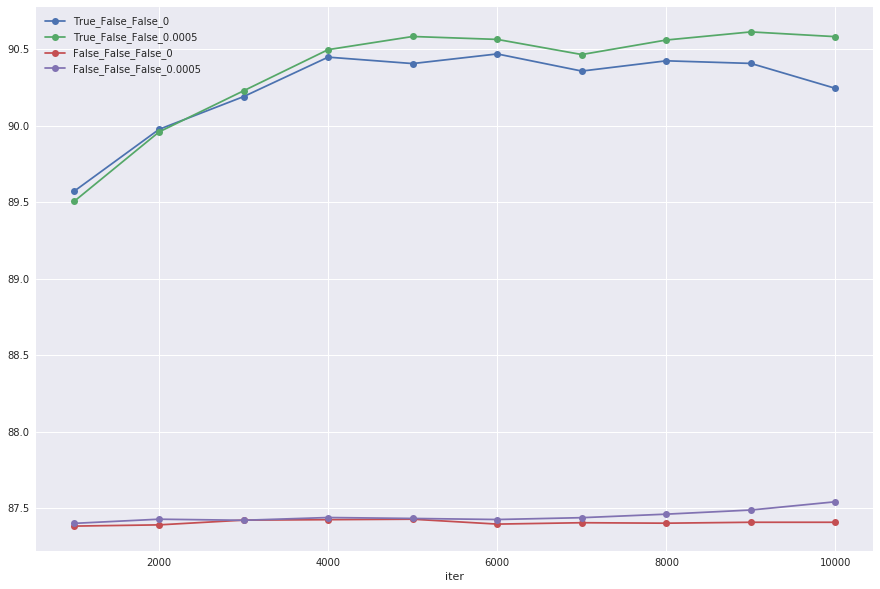

In [43]:
w = (0,0.0005)
b = (True, False)
s = product(b,(False,),(False,),w)
expdisp = [str(i[0])+'_'+str(i[1])+'_'+str(i[2])+'_'+str(i[3]) for i in list(s)]

plt.figure(figsize=(15, 10))

for i in range(4):
    cx = np.zeros((len(curves[1][0].x),10))
    cy = np.zeros((len(curves[1][0].y),10))
    for k in range(1,11):
        cx[:,k-1]= np.array(curves[k][i].x)
        cy[:,k-1]= np.array(curves[k][i].y) 
    plt.plot(cx.mean(1), cy.mean(1), "o-", label=expdisp[i])
    # legend = b1_b2_b3_c: b1 = Function norm or not; b2 = Batch norm. or not; b3 = Dropout or not; c = weight decay
    
plt.legend()
plt.xlabel('iter')
    

=========================================================================================================
Without only Function norm vs. only Batch norm.:
============================================================

In [51]:
w = (0,0.0005)
b = zip((True, False),(False, True))

In [52]:
expnames = {}
for k in range(1,11):
    s = product(b,w)
    expnames[k] = ['MNIST_300_'+str(k)+'_LeNet_'+str(i[0][0])+'_'+str(i[0][1])+'_False_'+str(i[1]) for i in list(s)]

In [54]:
expdirs = {}
expnames_kept = {}
for k in range(1,11):
    expdirs[k] = []
    expnames_kept[k] = []
    for exp in expnames[k]:
        this = 0
        b = True
        try:
            while b:
                this -= 1
                if osp.isdir(osp.join(basedir[k-1], exp)):
                    last = sorted(os.listdir(osp.join(basedir[k-1], exp)), key=int)[this]
                    expdir = osp.join(basedir[k-1], exp, last)
                    if osp.isfile(osp.join(expdir, "stats.pkl")):
                        expdirs[k].append(expdir)
                        expnames_kept[k].append(exp)
                        print(exp + ": loading", last)
                        break
                else:
                    b = False

        except IndexError:
            continue
        
expnames = expnames_kept

MNIST_300_1_LeNet_True_False_False_0: loading 10000
MNIST_300_1_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_1_LeNet_False_True_False_0: loading 10000
MNIST_300_1_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_2_LeNet_True_False_False_0: loading 10000
MNIST_300_2_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_2_LeNet_False_True_False_0: loading 10000
MNIST_300_2_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_3_LeNet_True_False_False_0: loading 10000
MNIST_300_3_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_3_LeNet_False_True_False_0: loading 10000
MNIST_300_3_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_4_LeNet_True_False_False_0: loading 10000
MNIST_300_4_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_4_LeNet_False_True_False_0: loading 10000
MNIST_300_4_LeNet_False_True_False_0.0005: loading 10000
MNIST_300_5_LeNet_True_False_False_0: loading 10000
MNIST_300_5_LeNet_True_False_False_0.0005: loading 10000
MNIST_300_5_LeNet_F

In [55]:
stats = {}
for k in range(1,11):
    stats[k] = []
    for expdir in expdirs[k]:
        stats[k].append(StatsLogger(expdir))

In [56]:
curves  = {}
for k in range(1,11):
    curves[k] = []
    for a in stats[k]:
        c = a.curve('Accuracy','test')
        curves[k].append(c)

Text(0.5,0,u'iter')

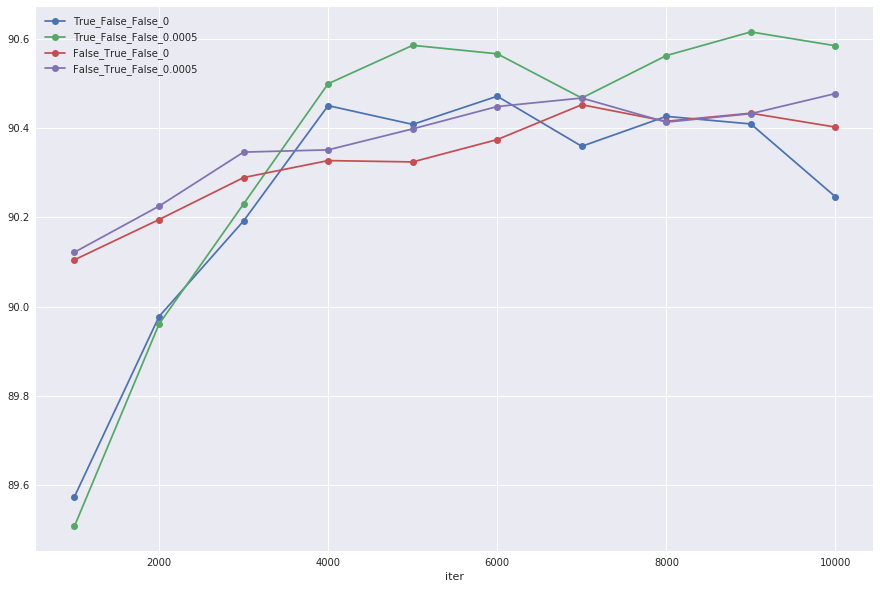

In [57]:
w = (0,0.0005)
b = zip((True, False),(False, True))
s = product(b,w)
expdisp = [str(i[0][0])+'_'+str(i[0][1])+'_False_'+str(i[1]) for i in list(s)]

plt.figure(figsize=(15, 10))

for i in range(4):
    cx = np.zeros((len(curves[1][0].x),10))
    cy = np.zeros((len(curves[1][0].y),10))
    for k in range(1,11):
        cx[:,k-1]= np.array(curves[k][i].x)
        cy[:,k-1]= np.array(curves[k][i].y) 
    plt.plot(cx.mean(1), cy.mean(1), "o-", label=expdisp[i])
    # legend = b1_b2_b3_c: b1 = Function norm or not; b2 = Batch norm. or not; b3 = Dropout or not; c = weight decay
    
plt.legend()
plt.xlabel('iter')
    